<a href="https://colab.research.google.com/github/kanchanraiii/CNN_Classifier/blob/main/CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Installing necessary libraries**

In [ ]:
!pip install tensorflow numpy matplotlib


###**Importing necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds



In [ ]:
# Load dataset (Images are 64x64)
dataset, info = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

# Split into training and validation sets
train_data = dataset['train'].take(18000)  # 18,000 images for training
val_data = dataset['train'].skip(18000).take(2000)  # 2,000 images for validation

# Function to resize and normalize images
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize to 150x150
    image = image / 255.0  # Normalize pixel values
    return image, label

# Apply preprocessing
train_data = train_data.map(preprocess).batch(32).shuffle(1000)
val_data = val_data.map(preprocess).batch(32)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.2BD3NF_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


### **Building the CNN with 3 layers to classify Cat & Dog**

In [ ]:
# CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Cat or Dog)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Training the model for 5**

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - accuracy: 0.5631 - loss: 0.7356 - val_accuracy: 0.7205 - val_loss: 0.5569
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 995s 2s/step - accuracy: 0.7213 - loss: 0.5473 - val_accuracy: 0.7820 - val_loss: 0.4695
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1066s 2s/step - accuracy: 0.7944 - loss: 0.4449 - val_accuracy: 0.7940 - val_loss: 0.4444
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1033s 2s/step - accuracy: 0.8425 - loss: 0.3543 - val_accuracy: 0.8135 - val_loss: 0.4182
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1054s 2s/step - accuracy: 0.8895 - loss: 0.2599 - val_accuracy: 0.8150 - val_loss: 0.4225


Saving Screenshot 2025-03-01 161027.png to Screenshot 2025-03-01 161027.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


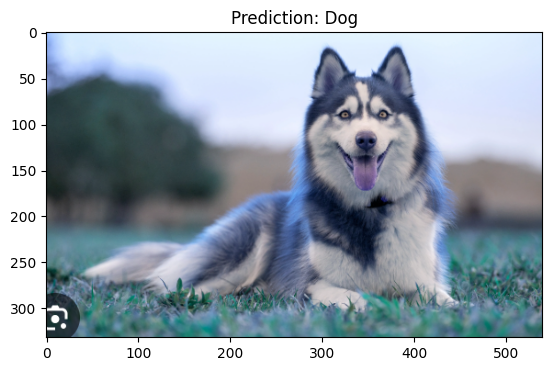

In [ ]:
import cv2
from google.colab import files

# Upload a new image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Read the image
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Reshape for model input

    # Predict
    prediction = model.predict(img)
    label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    # Display the result
    plt.imshow(cv2.imread(file_name))
    plt.title(f"Prediction: {label}")
    plt.show()


Saving cat.jpg to cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


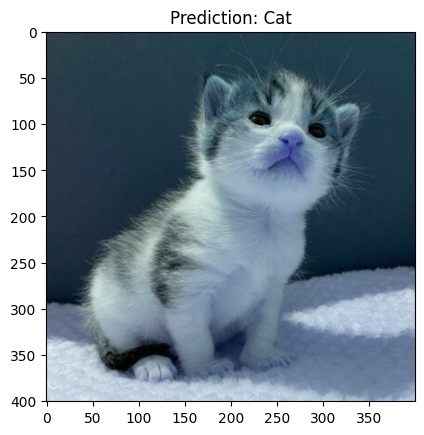

In [ ]:
import cv2
from google.colab import files

# Upload a new image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Read the image
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Reshape for model input

    # Predict
    prediction = model.predict(img)
    label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    # Display the result
    plt.imshow(cv2.imread(file_name))
    plt.title(f"Prediction: {label}")
    plt.show()


In [ ]:
model.save("cat_dog_classifier.h5")